# 1/File Directory

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ipba15-grade-ml-case-study-classification-11072023/sample_submission.csv
/kaggle/input/ipba15-grade-ml-case-study-classification-11072023/train.csv
/kaggle/input/ipba15-grade-ml-case-study-classification-11072023/test.csv


# 2/Import Packages

In [2]:
pip install summarytools

  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8577 sha256=94661ebc6e6a6697eed13f03e063a4d12a7222ea89bd9b2dcc3eb5335b7c36ba
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
from summarytools import dfSummary

# 3/Import Data

In [5]:
train = pd.read_csv("/kaggle/input/ipba15-grade-ml-case-study-classification-11072023/train.csv")
test = pd.read_csv("/kaggle/input/ipba15-grade-ml-case-study-classification-11072023/test.csv")

# 4/EDA & Preprocessing
## >Data Descriptives
## >>Train

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [7]:
dfSummary(train, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 838.0 (484.3)min < med < max:0.0 < 838.0 < 1676.0IQR (CV) : 838.0 (1.7),"1,677 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACLElEQVR4nO3XvavaYBiG8fvVU4kfTfCjurl07BZwcenWsX/sWbt7oLNDl04uIohGTI9UbLr0jPWYBGpvuH6rPnnevFwIhqIoBPzvGvc+AHCLh9e+EEJoS2pVfH5D0q+Ks5L0syiK5yqDNc99z93Od1bn7FfPfTXUEEJ7OBx+juO4X3br5XJ5k+f5+16v973RaJzLzkvSfr8/hhC+SDqVHI0Gg8GnJEm6Vfbea7fzndU9++Fw2IUQHv8W62u/qK04jvvz+fw5SZJSL75arfrL5fJdmqbfJpPJrsysJK3X67dPT08fp9PpqNlsltp9Pp8jSR9ms9nX0Wh0cNntfGd1zp5lWbRYLPrb7bYlqVKokqQkSU7j8fhHmeW73a4tSd1ut/Tsy3wURZ00TU9lX/zPpXWiKDo77Xa/M6n62SW1r314U6j3VOXFXy7NeXcdrue+hn/9sECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosPBwy5eyLIvKPvh4PEaSlOd5tNlsOv9y3nW367nrzt/S129w+TPf/1A7FwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 36.0 (8.5)min < med < max:18.0 < 35.0 < 60.0IQR (CV) : 11.0 (4.2),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACs0lEQVR4nO3dTW7iMBiA4c9DQQakRPwIdlyg0iyQ2HCAWc5h5wizYDFrbsAOCaEgMo0IP7MaqZVoC7HT+nPfZ++SxSuoHccxl8tFgNB9++wLAG7x8NkXECpjTFtEWhWHHy6Xy5PP6/nqCPUKY0x7MBj8TJKkV2X8brfbGmN+Eas/hHpdK0mS3nw+f0rTtLhnYJZldrFY9DabTUtECNUTQn1DmqbFaDT6W2Fo2/vFfHFMpqACoUIFQoUKhAoVop1MOa6DJufzuenzeuAm6FAdYrP9fv9HmqbdKp9blqU9nU6PRVH8FpEqs354FmyoLovuZVlaEXmczWZ/hsPh7t7xq9Wqt1wuO8fjsXHvWNQj2FDFYdH9f2jW2rLKOuh2u2UdNDAhhyoi1RbdCS0+zPqhAqFCBUKFCoQKFQgVKhAqVCBUqBD8OqpGp9OpKSKJMabKcJ63uoJQPcvzvFmW5ffJZNJoNBp33VET4Xmr1xCqZ4fD4cFa25lOp8V4PN7eM5bnrV5HqDXpdrs8b+URkymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQrsngqM46ZrkUg3XhNqQFw3XYvEu/GaUAPisulaJO6N14QaIIdN1yKRbrxmMgUVav1G5dRn+FJbqK5vv+PUZzxX5zdq5YN4RTj1GS/VPpmq+vY7DuPFc0ymoAKhQgVChQos+Ecm1gPaCDUiMR/QRqgRifmANkKNUIwHtDGZggqEChXe/el32FjCphJ482aorm94ZlOJLiE/BvPeN6rzG57ZVKJD6I/B3DTr5w3P8Qv9MRiWp/BCqI/BECq8qfP2LaHCi7pv3xIqvKj79i2hwqu6bt9yZwoqECpUIFSocNP/qFmW2Xv/8H6/tyIieZ7b9Xrd+cjxWj9b63W7jr+lr3+8gq6b7yyBNQAAAABJRU5ErkJggg=="">",0(0.0%)
3,BusinessTravel[object],1. Travel_Rarely2. Travel_Frequently3. Non-Travel,"1,290 (76.9%)261 (15.6%)126 (7.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABnElEQVR4nO3bQWoiYRSF0VeNhM6kChFcjIvoxfYiajci1iAJmVQGTaCnlnr/n+5zVvDAT6XEO6zrWpDwo/UB/D+GqnqtqpfWh/AUn+u6vrc+4tvucDj8Gsdx3/oQHm9ZlsswDL97CW43juP+dDq9T9P00foYHud6vf6c53l/Pp9fqqqP2Kqqpmn6OB6Pb62P4eFeWx/wNw8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZVf3571PrQ3isHl/T3bIsl3me99XZf5+437Isl6r6bH3HNxuEf1tXG4TBlI+UxCdbV+8u2nn6uqq3hQ/tPHVd1ePCh3YS6ypPuVSVH3UJEhsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEfPUdVWPCx/aefq6qreFD+3YIBBjXUWMBwRitnyN+lpkk5unfKZ5bHXTlM80j3tsmfKZ5rGJBwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxNw05TPN4x43T/lM89jKBoEYUz5ivgBKvKNKOIK9wQAAAABJRU5ErkJggg=="">",0(0.0%)
4,DailyRate[int64],Mean (sd) : 892.7 (374.5)min < med < max:107.0 < 890.0 < 3921.0IQR (CV) : 634.0 (2.4),625 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACNUlEQVR4nO3dMW7iQBiG4X/WgAxIthASdFxgpRSUHGIPu0dIwQm4AR0Ssoxw4sUYp0q12gR7cOLP+z79GBevSDz+Nbiqqgzouh/ffQPAPQZtXtw5NzazkcclLlVVvT7qfqCrtVCdc+P5fP4riqJZ02ucTqfEOfebWNHmN+ooiqLZZrN5jeM4r7s4TdNwu93OjsfjyMwI9T/X6p9+M7M4jvPFYvHScPn4oTcDWTxMQQKhQgKhQkLr/6P6KMtyaGaRc67Jcra2eqSzoWZZNiyK4mm1WgVBENTeNWBrq186G+rlchmEYThZ

## >>Test

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1119 non-null   int64 
 1   Age                       1119 non-null   int64 
 2   BusinessTravel            1119 non-null   object
 3   DailyRate                 1119 non-null   int64 
 4   Department                1119 non-null   object
 5   DistanceFromHome          1119 non-null   int64 
 6   Education                 1119 non-null   int64 
 7   EducationField            1119 non-null   object
 8   EmployeeCount             1119 non-null   int64 
 9   EnvironmentSatisfaction   1119 non-null   int64 
 10  Gender                    1119 non-null   object
 11  HourlyRate                1119 non-null   int64 
 12  JobInvolvement            1119 non-null   int64 
 13  JobLevel                  1119 non-null   int64 
 14  JobRole                 

In [9]:
dfSummary(test, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 2236.0 (323.2)min < med < max:1677.0 < 2236.0 < 2795.0IQR (CV) : 559.0 (6.9),"1,119 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACI0lEQVR4nO3Xu47aUBRG4X3MBB0uscUl0NGkTGeJhiZdyjxs2vQgTU0xTSoahISMEc6gWMR5gjDYZzTJL9bX4u1tjpeQcFVVGfC/i/71AwC3eHjpAudcx8zaDe8fmdnvhrOh86G7f1VV9dxk8I7PLGT+6nlfDdU51xmNRl/jOB7U3Xq5XN4VRfGx3+//iKKofMv50N1mZofD4eSc+25m55qjfjgcfkmSpFd3p/KZhc4fj8fMOfftb7G+9IvajuN4sFgsnpMkqfXCNpvNYL1ef0jT9Gk6nWZ1ZkPnQ3dvt9v3q9Xq82w2G7darVrfuyxLb2af5vP543g8PtaZVT6zkPk8z/1yuRzs9/u2mTUK1czMkiQ5TyaTn3WWZ1nWMTPr9Xq1Z0PnX2O3976bpum54Qvveu/LezuzkHkz61z78KZQ71XIC8fr4l8/JBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDzcclGe577ujU+nkzczK4rC73a77lvOq+5Wfe7Q+Vv6+gOXhTflY1HESAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 36.1 (8.8)min < med < max:18.0 < 35.0 < 59.0IQR (CV) : 11.0 (4.1),42 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClklEQVR4nO3dwaraQBSA4TPNVaJCglh05wsUunDpQ/Rh+wgVfALfwJ0QQsT0BmNM1wXr1cykd874f/vpzeJHktNJxrRtK4Dvvnz2BQCPePvsC/CVMWYkIsOOy89t2767vJ5XR6g3GGNGs9nsR5Ik0y7rj8djboz5SazuEOptwyRJpuv1+j1N0+qZhUVRxNvtdppl2VBECNURQr0jTdNqPp//7rB05PxiXlywoVreYybX63Xg8npgJ8hQbe8x67qOm6b5VlXVLxHp8osKx4IMVSzuMUVE9vv9dLfbjS+XS9THxeF5oYYqIt3vMfM85x7TMwz8oQKhQgVChQqEChUIFSp4/dRvMbRnYB8Yb0O1GdozsA+Pt6GKxdCegX14fA5VRLoN7RnYh4eHKahAqFCBUKECoUIFQoUKhAoVvB9PadQ0zUBEEmNMl+W8an0DoTpWluWgruvvy+UyiqLo6bcLeNX6NkJ17Hw+v8VxPF6tVtViscifWcur1v9GqD2ZTCa8au0QD1NQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgX+r98zllsERQLdJkioHrHdIigS7jZBQvWIzRZBkbC3CfYaKgc+dGOxRVAk0G2CvYXKgQ9wqc9fVA58gDO936Ny4ANcYI4KFQgVKjCeCkyo3xQg1ICE/E0BQg1IyN8UINQAhfhNAR6moMKHv6gcoQMf3A2VI3Rei89bDD/6ReUInRfh+xbDhx6mOEInfC62GG42m3mWZV+NMccul3AvcJ768ZeuE4O+Z7iECif6nuESKpzqa4bLHBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFR4a+BdFET/7D59Op1hEpCzL+HA4jP/neq1/W+t1265/pK8/GTO5wESz1GgAAAAASUVORK5CYII="">",0(0.0%)
3,BusinessTravel[object],1. Travel_Rarely2. Travel_Frequently3. Non-Travel,799 (71.4%)212 (18.9%)108 (9.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bwWnjYBSF0afBhMlGwhhcjIuYYqcIdWOCtUhCNsoiDVi2uD8/OaeCB/5io6A7rOtakPCn9QH8HkNVvVbVS+tDeMjXuq4frY+41+F0Ov0bx/HY+hC2W5blbRiG/70EdxjH8Xi5XD6mafpsfQz3u91uf+d5Pl6v15eq6iO2qqppmj7P5/N762PY7LX1AVt4QCBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzKHq592o1oewTY+f2WFZlrd5no/V2btR/LypW1Vfre+4lw1C37raIAymfKS0+mbr6i+SfTRZV/W2CmIf8XVVj6sg9tFqXeXJ9xfyT11ixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxMTXVT2ugthHk3VVb6sg9mGDQIx1FTEeEIh59mfUzyF3e2rKZ5LHFg9P+Uzy2OrZKZ9JHnfzgECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmIenfCZ5bPXUlM8kjy1sEIgx5SPmG0q8o0qhM+1uAAAAAElFTkSuQmCC"">",0(0.0%)
4,DailyRate[int64],Mean (sd) : 883.6 (366.4)min < med < max:6.0 < 889.0 < 1499.0IQR (CV) : 617.0 (2.4),515 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACk0lEQVR4nO3dz2riUBSA8ZOxSqqQIILufIGBLlz6EPOw8wiz8Al8A3eCSMRMgzGmi2EGF6X15uZOzkm/3z42gY9ybv5GdV0LoN23rncAeMRT1zsAPaIoehaRkcdPXOq6fm1rf+4RKkTkT6Sz2exHkiTTpr9xOp2OURT9DBEroeKvUZIk0/V6/ZqmaeG6cZZl8WazmR4Oh5GIECrCStO0mM/nvxtu/tzqztzpbaia5y2462Wo2uctuOtlqKJ83oK7voYqInrnLbjrdag+qqoaikgSRVGTzZlvW0ao78jzfFiW5ctyuRwMBgPn0aHL+dZjEZncbrdh2/vTFkJ9x+VyeYrjeLxarYrFYnF02bbL+dZnEVmWZ

## >Identifying & Splitting data into Numerical and Categorical features
## >>Train

In [10]:
train_numerical = train.select_dtypes(include = 'number').columns.tolist()
print(train_numerical)

['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [11]:
print(len(train_numerical))

27


In [12]:
train_categorical = train.select_dtypes(exclude = 'number').columns.tolist()
print(train_categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
print(len(train_categorical))

8


## >>Test

In [14]:
test_numerical = test.select_dtypes(include = 'number').columns.tolist()
print(test_numerical)

['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [15]:
print(len(test_numerical))

26


In [16]:
test_categorical = test.select_dtypes(exclude = 'number').columns.tolist()
print(train_categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [17]:
print(len(train_categorical))

8


## >Outliers Detection
## >>Train

<Axes: >

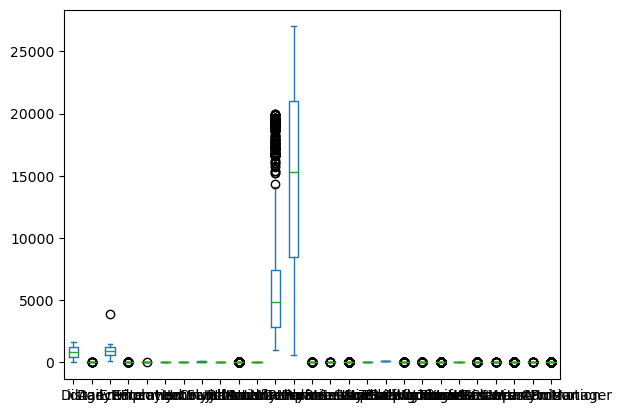

In [18]:
train[train_numerical].plot.box()

## >>Test

<Axes: >

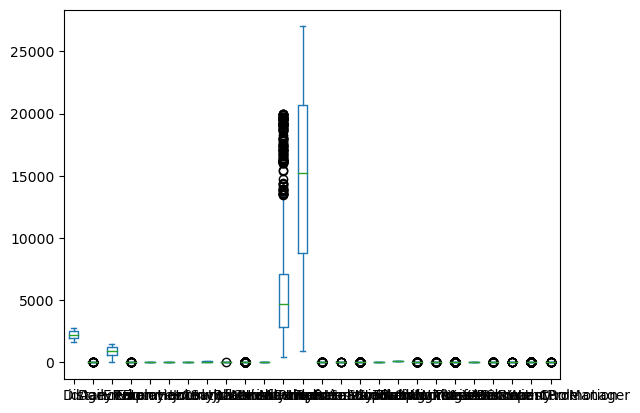

In [19]:
test[test_numerical].plot.box()

## >Outliers Treatment
## >>Train

In [20]:
# Create function

def treat_outlier(nf):
    for column in nf:
        
        # using IQR
        q1 = train[column].quantile(0.25)
        q3 = train[column].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        train[column] = np.where(nf[column] < lower_bound, lower_bound, nf[column])
        train[column] = np.where(nf[column] > upper_bound, upper_bound, nf[column])

In [21]:
treat_outlier(train[train_numerical])

<Axes: >

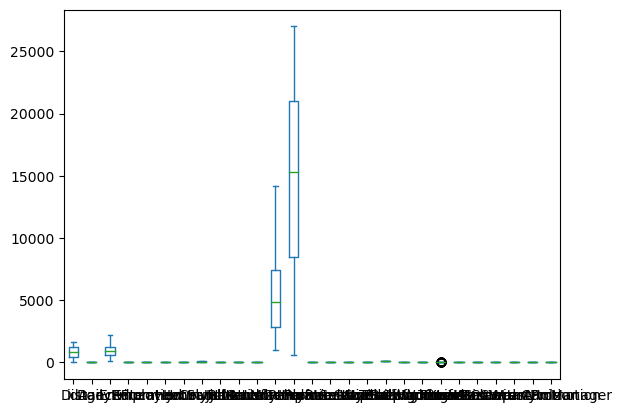

In [22]:
train[train_numerical].plot.box()

## >>Test

In [23]:
# Create function

def treat_outlier(nf):
    for column in nf:
        
        # using IQR
        q1 = test[column].quantile(0.25)
        q3 = test[column].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        test[column] = np.where(nf[column] < lower_bound, lower_bound, nf[column])
        test[column] = np.where(nf[column] > upper_bound, upper_bound, nf[column])

In [24]:
treat_outlier(test[test_numerical])

<Axes: >

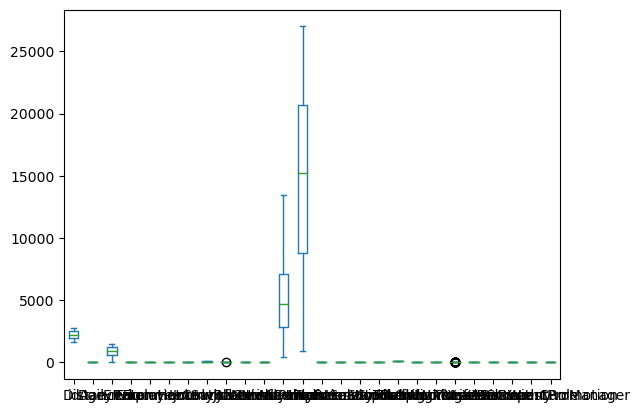

In [25]:
test[test_numerical].plot.box()

## >Transformation - Categorical Encoding
## >>Ordinal encoding

In [26]:
# Define the ordinal mapping for BusinessTravel
ordinal_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

## >>>Train

In [27]:
# Apply ordinal encoding to the "BusinessTravel" column
train['BusinessTravel_Encoded'] = train['BusinessTravel'].map(ordinal_mapping)

### >>>Test

In [28]:
# Apply ordinal encoding to the "BusinessTravel" column
test['BusinessTravel_Encoded'] = test['BusinessTravel'].map(ordinal_mapping)